<a href="https://colab.research.google.com/github/rmarvel23/projects/blob/main/Twitterproyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import chardet
import pandas as pd

def detectar_encoding(archivo_csv):
    with open(archivo_csv, 'rb') as f:
        resultado = chardet.detect(f.read())
    return resultado['encoding']


In [3]:
detectar_encoding("/content/train.csv")

'Windows-1252'

In [74]:
def read_csv(csv, encoding):
    df = pd.read_csv(csv, encoding=encoding, on_bad_lines='skip')
    return df

In [75]:
df = read_csv('/content/train.csv','Windows-1252' )

In [76]:
class DataError(Exception):
    pass

In [77]:
class DataReviewer:

    def __init__(self,df):
      self.df = df
      self.data_cleaner = DataCleaner(df)

    def show_sample(self, n=5):
      try:
            return self.df.sample(n)
      except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def get_info(self):
        try:
            return self.df.info()
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def describe(self):
        try:
            return self.df.describe()
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def get_columns(self):
        try:
            return self.df.columns
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def count_rows(self, column):
        try:
            if column in self.df.columns:
                return self.df[column].count()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        except Exception as e:
            raise DataError(f"Error counting rows: {e}")

    def get_unique(self,column):
        try:
            if column in self.df.columns:
                return self.df[column].unique()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        except Exception as e:
            raise DataError(f"Error getting unique values: {e}")

    def check_nulls(self):
        try:
            return self.df.isnull().any()
        except Exception as e:
            raise DataError(f"Error checking nulls: {e}")

    def get_dtypes(self):
        try:
            return self.df.dtypes
        except Exception as e:
            raise DataError(f"Error checking nulls: {e}")

    def shape(self):
        try:
            return self.df.shape
        except Exception as e:
            raise DataError(f"Error getting shape: {e}")

    def count_unique(self, column):
        try:
            if column in self.df.columns:
                return self.df[column].nunique()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        except Exception as e:
            raise DataError(f"Error counting unique values: {e}")

In [93]:
class DataCleaner:
    def __init__(self, df):
        self.df = df

    def drop_unnecessary_col(self):
        unnecessary_columns = ['textID', 'selected_text', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²);;;;;;;;;;;;']
        try:
            self.df = self.df.drop(columns=unnecessary_columns, errors='ignore')
            return self.df
        except KeyError as e:
            raise DataError(f"Error dropping columns: {e}")

    def remove_nulls(self):
        columns_to_check = ["sentiment", "Time of Tweet", "Age of User", "Country"]
        try:
            self.df = self.df.dropna(subset=columns_to_check)
            return self.df
        except KeyError as e:
            raise DataError(f"Error dropping nulls: {e}")

    def rename_col(self):
        try:
            self.df = self.df.rename(columns={"Time of Tweet": "Time", "Age of User": "Age"})
            return self.df
        except KeyError as e:
            raise DataError(f"Error renaming columns: {e}")


In [116]:
df

,text,sentiment,Time,Age,Country
0,NaN,NaN,NaN,NaN,NaN
1,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania
2,my boss is bullying me...,negative,night,31-45,Algeria
3,what interview! leave me alone,negative,morning,46-60,Andorra
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
27432,wish we could come see u on Denver husband l...,negative,night,31-45,Ghana
27433,NaN,NaN,NaN,NaN,NaN
27434,Yay good for both of you. Enjoy the break - y...,positive,noon,60-70,Grenada
27435,But it was worth it ****.,positive,night,70-100,Guatemala


In [156]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

class DataVisualizer(ABC):
    def __init__(self, df):
        self.df = df

    @abstractmethod
    def get_positive(self):
        pass

    @abstractmethod
    def get_negative(self):
        pass

    @abstractmethod
    def get_sentiment(self):
        pass

    @abstractmethod
    def compare_sentiment(self):
        pass

class CountryAnalyzer(DataVisualizer):

    def __init__(self, df, country):
        super().__init__(df)
        self.country = country

    def get_positive(self):
        try:
            return self.df[(self.df['Country'] == self.country) & (self.df['sentiment'] == "positive")].shape[0]
        except Exception as e:
            print(f"Error getting positive sentiment for {self.country}: {e}")

    def get_negative(self):
        try:
            return self.df[(self.df['Country'] == self.country) & (self.df['sentiment'] == "negative")].shape[0]
        except Exception as e:
            print(f"Error getting negative sentiment for {self.country}: {e}")

    def get_sentiment(self):
        try:
            sentiment_counts = self.df[self.df['Country'] == self.country]['sentiment'].value_counts()
            sentiment_counts.plot(kind='bar', figsize=(10, 6))
            plt.title(f'Tweets in {self.country}')
            plt.xlabel('Sentiment')
            plt.ylabel('Number of Tweets')
            plt.show()
        except Exception as e:
            print(f"Error plotting sentiment for {self.country}: {e}")

    def compare_sentiment(self,sentiment="negative"):
        try:
            tweets_by_country = self.df[self.df['sentiment'] == sentiment]['Country'].value_counts()
            country_sentiments = self.df[self.df['sentiment'] == sentiment]["Country"].value_counts()
            top_countries = tweets_by_country.head(10).sort_values(ascending=False)
            plt.figure(figsize=(12, 8))

            colors = plt.cm.tab20(range(len(f'top_countries_{sentiment}')))

            bars = plt.bar(top_countries.index, top_countries.values, color=colors)



            plt.xlabel('Country')
            plt.ylabel('Number of Negative Tweets')
            plt.title('Top 15 Countries with Most Negative Tweets')

            plt.show()
        except Exception as e:
            print(f"Error comparing sentiment: {e}")

            country_names = top_countries_negative.index
            plt.legend(country_names, loc='upper right')
            plt.xticks(rotation=45, ha='right', fontsize=7)

            plt.show()
        except Exception as e:
            print(f"Error comparing sentiment: {e}")

In [157]:
visualize1 = CountryAnalyzer(df,'Guinea')

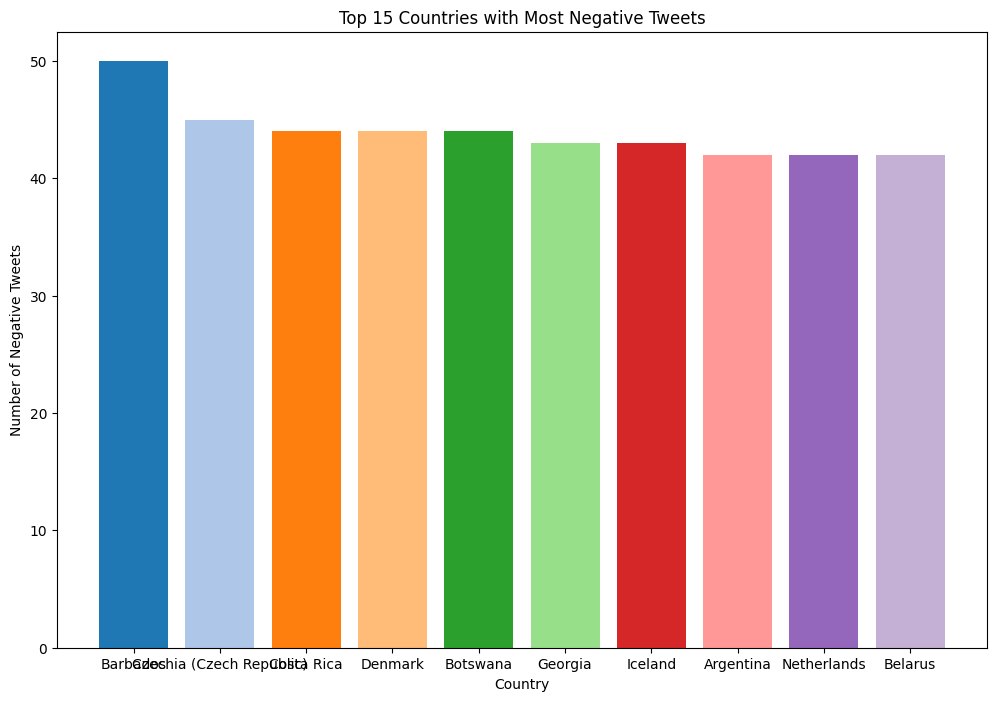

In [158]:
visualize1.compare_sentiment('positive')

Solucionar los nombres de países solapados. Asegurarme de que el código de matplotlib está bien. Hacer otro tipo de gráficas para comparar países. Hacer otra clase que se base en la abstracta pero que sea para comparar edades.
